In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, CatBoostClassifier, Pool
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

from scripts import *

In [3]:
%store -r df_merged
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8499 entries, 2012-11-01 00:00:00 to 2021-02-28 21:00:00
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           8499 non-null   float64
 1   T_a         8499 non-null   float64
 2   DD          8499 non-null   object 
 3   Ff          8499 non-null   float64
 4   N           8491 non-null   float64
 5   Nh          6727 non-null   float64
 6   Cl          6727 non-null   object 
 7   Po          8496 non-null   float64
 8   U           8488 non-null   float64
 9   Ch          3019 non-null   object 
 10  Cm          5181 non-null   object 
 11  H           6739 non-null   object 
 12  RRR         2141 non-null   object 
 13  DD_         8499 non-null   object 
 14  diff        8499 non-null   float64
 15  abs_diff    8499 non-null   float64
 16  T_kal       8488 non-null   float64
 17  T_sher      8494 non-null   float64
 18  T_sar       6675 non-null   floa

In [8]:
# try catboost reg
df_merged_c = df_merged.copy()
df_merged_c = df_merged_c[df_merged_c['abs_diff'] > 1]

df_merged_c['Cl'] = df_merged_c['Cl'].fillna(0)
df_merged_c['Ch'] = df_merged_c['Ch'].fillna(0)
df_merged_c['Cm'] = df_merged_c['Cm'].fillna(0)
df_merged_c['H'] = df_merged_c['H'].fillna(0)
df_merged_c['RRR'] = df_merged_c['RRR'].fillna(0)

In [9]:
# splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_merged_c.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a']),df_merged_c['diff'], test_size=0.7, shuffle=True)

In [9]:
train_data = df_merged_c['2012':'2019-03']
# train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a', 'T_kal', 'T_sher', 'T_sar', 'three_mean'])
eval_data = df_merged_c['2019-11':]
eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a', 'T_kal', 'T_sher', 'T_sar', 'three_mean'])
# eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a'])
train_labels = df_merged_c['2012':'2019-03']['diff']
eval_labels = df_merged_c['2019-11':]['diff']

In [6]:
model = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=10,
                         l2_leaf_reg=5,
                         learning_rate=0.3)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [36]:
model = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=10,
                         l2_leaf_reg=5,
                         learning_rate=0.3)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model.fit(X_train,
          y_train,
          verbose=False,
         cat_features=cat_cols)

In [39]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

0.7041225470206153

In [29]:
# for visualize
model_v3 = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=3,
                            max_ctr_complexity=1,
                            one_hot_max_size=15)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model_v3.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [8]:
# for visualize
model_v4 = CatBoostRegressor(iterations=1000, # {'depth': 10, 'l2_leaf_reg': 5, 'iterations': 1000, 'learning_rate': 0.3}
                           task_type="GPU",
                           devices='0:1',
                         depth=4)
cat_cols = ['DD', 'DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']
cat_cols = ['DD_', 'Cl', 'Cm','Ch', 'H', 'RRR']

model_v4.fit(train_data,
          train_labels,
          verbose=False,
         cat_features=cat_cols)

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6652 entries, 2012-11-01 00:00:00 to 2019-02-28 21:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           6652 non-null   float64
 1   Ff          6652 non-null   float64
 2   N           6644 non-null   float64
 3   Nh          5188 non-null   float64
 4   Cl          6652 non-null   object 
 5   Po          6651 non-null   float64
 6   U           6645 non-null   float64
 7   Ch          6652 non-null   object 
 8   Cm          6652 non-null   object 
 9   H           6652 non-null   object 
 10  RRR         6652 non-null   object 
 11  DD_         6652 non-null   object 
 12  T_kal       6642 non-null   float64
 13  T_sher      6649 non-null   float64
 14  T_sar       4834 non-null   float64
 15  three_mean  4826 non-null   float64
dtypes: float64(10), object(6)
memory usage: 883.5+ KB


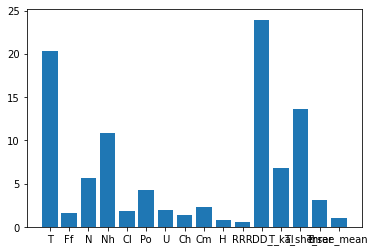

In [13]:
# plt.bar([0,1,2,3,4,5,6,7,8,9, 10, 11,12,13,14, 15], model.get_feature_importance())
plt.bar(train_data.columns.values.tolist(), model.get_feature_importance())
plt.show()

<BarContainer object of 16 artists>

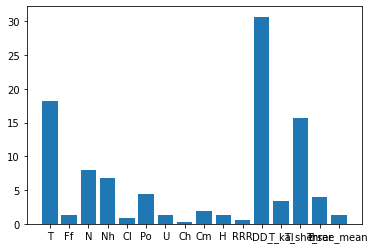

In [18]:
plt.bar(train_data.columns.values.tolist(), model_v3.get_feature_importance())

### Visualization of CatBoost decision trees
https://github.com/catboost/tutorials/blob/master/model_analysis/visualize_decision_trees_tutorial.ipynb

https://stackoverflow.com/questions/65634161/how-to-get-catboost-visualization-to-show-the-categories

In [14]:
is_cat = (train_data.dtypes != float)
cat_features_index = np.where(is_cat)[0]

pool = Pool(train_data, train_labels, cat_features=cat_features_index, feature_names=list(train_data.columns))

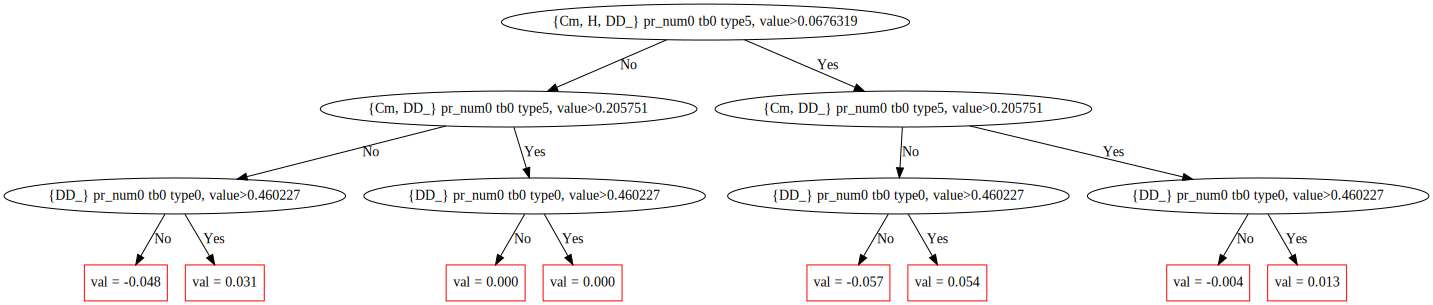

In [22]:
model_v3.plot_tree(tree_idx=0, pool=pool)

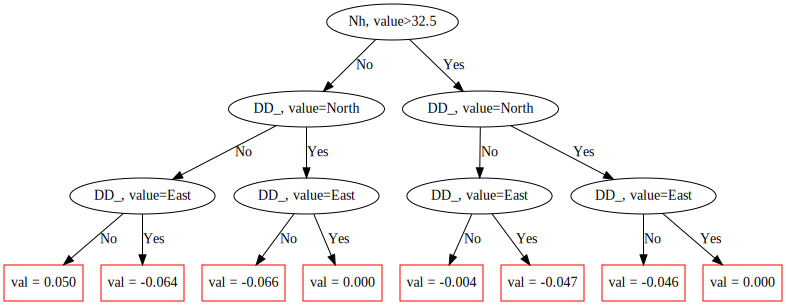

In [30]:
model_v3.plot_tree(tree_idx=0, pool=pool)

In [ ]:
model_v3.plot_tree(tree_idx=0, pool=pool)

### feature_statistics_tutorial

In [43]:
feature = 'DD_'
res = model_v3.calc_feature_statistics(train_data, train_labels, feature, plot=True)

### shap_values_tutorial

In [35]:
import shap
shap.initjs()
shap_values = model.get_feature_importance(Pool(train_data, train_labels, cat_features=cat_cols), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], train_data.iloc[0,:])

In [44]:
# visualize the training set predictions
shap.force_plot(expected_value, shap_values[:250], train_data[:250])

In [41]:
shap_values.shape

(2134, 12)

In [1]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Ff", shap_values, train_data)

NameError: name 'shap' is not defined

In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6652 entries, 2012-11-01 00:00:00 to 2019-02-28 21:00:00
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   T           6652 non-null   float64
 1   Ff          6652 non-null   float64
 2   N           6644 non-null   float64
 3   Nh          5188 non-null   float64
 4   Cl          6652 non-null   int32  
 5   Po          6651 non-null   float64
 6   U           6645 non-null   float64
 7   Ch          6652 non-null   object 
 8   Cm          6652 non-null   object 
 9   H           6652 non-null   object 
 10  RRR         6652 non-null   object 
 11  DD_         6652 non-null   object 
 12  T_kal       6642 non-null   float64
 13  T_sher      6649 non-null   float64
 14  T_sar       4834 non-null   float64
 15  three_mean  4826 non-null   float64
dtypes: float64(10), int32(1), object(5)
memory usage: 857.5+ KB


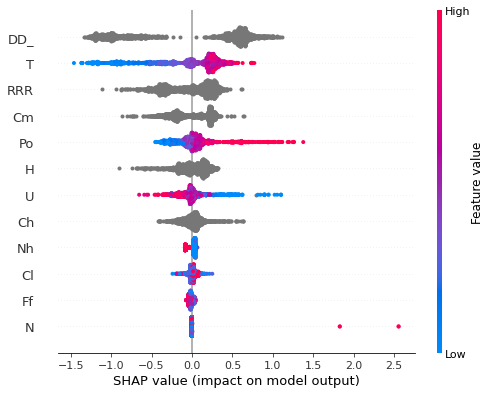

In [8]:
shap.summary_plot(shap_values, train_data)

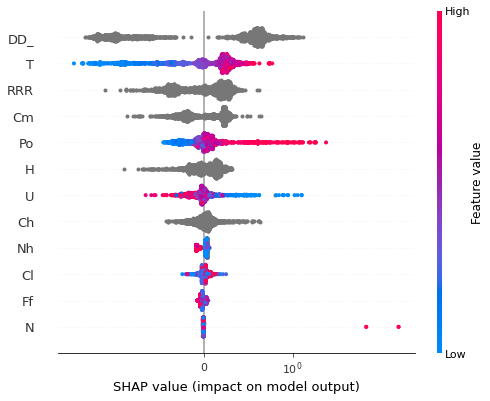

In [9]:
shap.summary_plot(shap_values, train_data, use_log_scale=True)

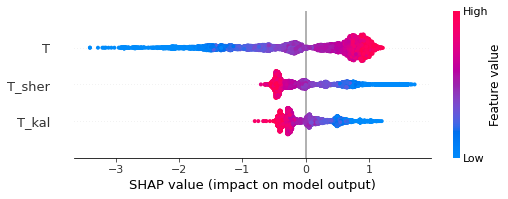

In [22]:
shap.summary_plot(shap_values, train_data, max_display=3)

### object importance

In [21]:
train_pool = Pool(train_data, train_labels, cat_features=cat_features_index, feature_names=list(train_data.columns))
val_pool = Pool(eval_data, eval_labels, cat_features=cat_features_index, feature_names=list(eval_data.columns))       

indices, scores = model.get_object_importance(
    val_pool,
    train_pool,
    importance_values_sign='Positive' # Positive values means that the optimized metric
                                      # value is increase because of given train objects.
                                      # So here we get the indices of bad train objects.
)

TypeError: unhashable type: 'numpy.ndarray'

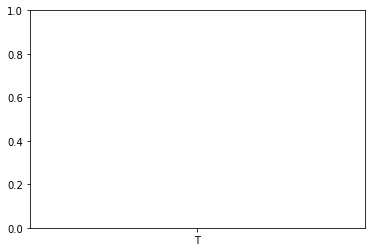

In [49]:
fi = model.get_feature_importance(data=val_pool, type='LossFunctionChange', prettified=True)
plt.bar(train_data.columns.values.tolist(), fi)
plt.show()

In [52]:
fi

,Feature Id,Importances
0,DD_,32.029701
1,T,12.515911
2,RRR,12.376180
3,Po,10.703033
4,U,8.662511
5,H,8.112488
6,Cm,6.920847
7,Ch,5.479700
8,Cl,1.209396
9,Nh,0.883136


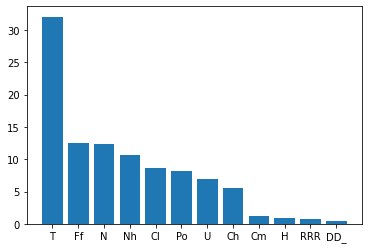

In [60]:
fi = model.get_feature_importance(data=train_pool, type='PredictionValuesChange', prettified=True)
plt.bar(eval_data.columns.values.tolist(), fi['Importances'])
plt.show()

In [61]:
fi

,Feature Id,Importances
0,DD_,32.029701
1,T,12.515911
2,RRR,12.376180
3,Po,10.703033
4,U,8.662511
5,H,8.112488
6,Cm,6.920847
7,Ch,5.479700
8,Cl,1.209396
9,Nh,0.883136


#### labelEncoder, catboost and shap values

In [25]:
# data

df_merged_c = df_merged.copy()
df_merged_c = df_merged_c[df_merged_c['abs_diff'] > 1]

df_merged_c['Cl'] = df_merged_c['Cl'].fillna('-')
df_merged_c['Ch'] = df_merged_c['Ch'].fillna('-')
df_merged_c['Cm'] = df_merged_c['Cm'].fillna('-')
df_merged_c['H'] = df_merged_c['H'].fillna('-')
df_merged_c['RRR'] = df_merged_c['RRR'].fillna('-')


train_data = df_merged_c['2012':'2019-03']
train_data = train_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a', 'T_kal', 'T_sher', 'T_sar', 'three_mean'])
eval_data = df_merged_c['2019-11':]
eval_data = eval_data.drop(columns=['diff','abs_diff','diff_3','abs_diff_3', 'T_a', 'T_kal', 'T_sher', 'T_sar', 'three_mean'])
train_labels = df_merged_c['2012':'2019-03']['diff']
eval_labels = df_merged_c['2019-11':]['diff']

train_data1 = train_data.copy()

In [38]:
categorical_columns = ['DD', 'Cl', 'Cm', 'Ch', 'H', 'RRR', 'DD_']

for col in categorical_columns:
    train_data1[col] = train_data1[col].astype('category').cat.codes

,T,DD,Ff,N,Nh,Cl,Po,U,Ch,Cm,H,RRR,DD_
2012-11-01 00:00:00,-1.9,8,3.0,0.0,NaN,0,763.7,75.0,0,0,0,0,2
2012-11-01 03:00:00,-3.7,8,2.0,10.0,10.0,3,764.9,83.0,8,3,5,0,2
2012-11-01 06:00:00,-5.1,8,1.0,100.0,0.0,3,766.4,90.0,5,5,5,0,2
2012-11-01 09:00:00,-6.6,10,1.0,0.0,NaN,0,767.6,94.0,0,0,0,13,2
2012-11-03 09:00:00,-0.3,9,2.0,100.0,100.0,3,749.8,68.0,0,4,5,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28 06:00:00,-17.5,15,1.0,25.0,0.0,3,743.5,85.0,5,5,5,0,3
2019-02-28 12:00:00,-11.0,13,1.0,0.0,NaN,0,743.2,87.0,0,0,0,0,4
2019-02-28 15:00:00,-7.1,15,1.0,0.0,NaN,0,742.5,63.0,0,0,0,0,3
2019-02-28 18:00:00,-9.6,13,2.0,0.0,NaN,0,742.4,72.0,0,0,0,0,4


In [41]:
model = CatBoostRegressor(iterations=1000,
                           task_type="GPU",
                           devices='0:1',
                         depth=10,
                         l2_leaf_reg=5,
                         learning_rate=0.3)

model.fit(train_data1,
          train_labels,
          verbose=False)

In [43]:
import shap
shap.initjs()
shap_values = model.get_feature_importance(Pool(train_data1, train_labels), type='ShapValues')

expected_value = shap_values[0,-1]
shap_values = shap_values[:,:-1]

# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], train_data1.iloc[0,:])

In [71]:
shap.force_plot(expected_value, shap_values[:500], train_data[:500])

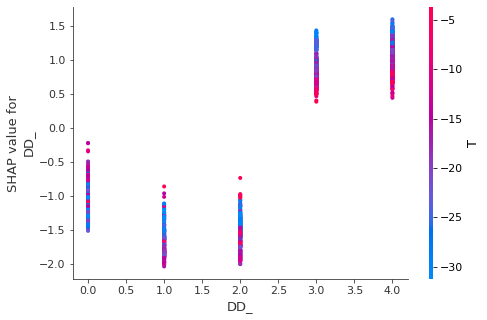

In [53]:
shap.dependence_plot("DD_", shap_values, train_data1)

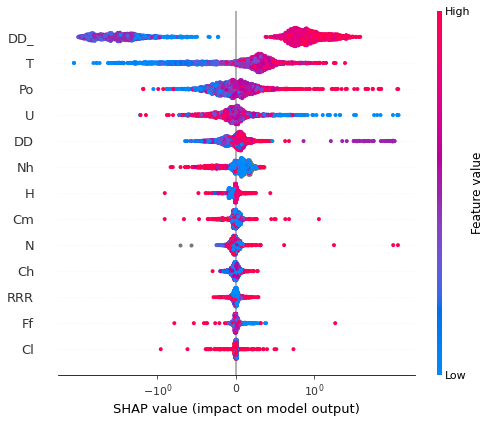

In [61]:
shap.summary_plot(shap_values, train_data1, use_log_scale=True)

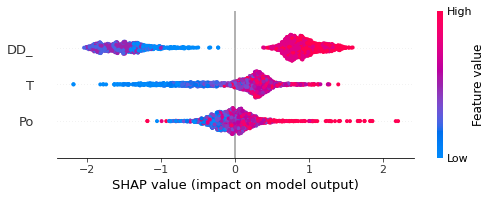

In [69]:
shap.summary_plot(shap_values, train_data1, max_display=3)

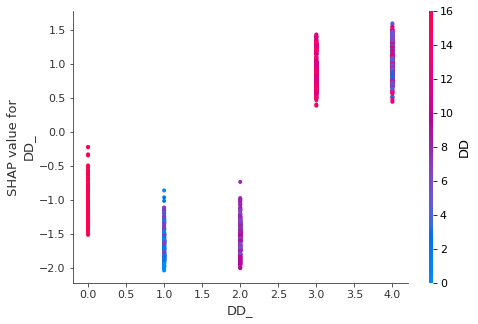

In [63]:
shap.dependence_plot('DD_', shap_values, train_data1, interaction_index="DD")

In [ ]:
#

In [ ]:
#